# INFORMACIÓN DEL PROYECTO

## EDA Yeray Exposito

#### Estudio Cinematografico

En la industria cinematográfica, la elección de los géneros en los que invertir es un aspecto clave para el éxito de una productora. Con el mercado audiovisual en constante cambio y la creciente competencia en la creación de contenido, es fundamental tomar decisiones informadas y basadas en datos sólidos. Este estudio tiene como objetivo realizar un Análisis Exploratorio de Datos (EDA) que permita a nuestra productora de cine identificar los géneros más rentables y prometedores en los que invertir.

Para llevar a cabo este análisis, se recopilarán y analizarán datos de diversas fuentes, como taquillas, plataformas de streaming y críticas de expertos, teniendo en cuenta factores como ingresos, costos de producción, popularidad, preferencias del público y tendencias actuales en la industria cinematográfica. Además, se investigará el comportamiento de los consumidores en relación con las películas de distintos géneros y se evaluará el impacto de factores externos como la situación económica y social en la preferencia de géneros.

Con el EDA, se pretende proporcionar una visión integral del panorama cinematográfico actual y, a partir de ello, establecer una estrategia de inversión en géneros que maximice el retorno de la inversión y el posicionamiento en el mercado de nuestra productora. Esta información será de gran valor para la toma de decisiones, permitiéndonos enfocar nuestros recursos en proyectos con el mayor potencial de éxito en el mercado cinematográfico.

### HIPÓTESIS

La principal hipótesis consiste en que genero es el mas consumido por el publico y hasta que punto resulta rentable por costes y produccion, si influye la duracion de una pelicula a la hora de costes o popularidad y que idiomas son los principales para poder hacer una buena produccion.

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

Los datos los he extraido de diferentes fuentes a lo largo del proyecto, desde paginas menos accesibles que requerian de webscrapping a otras mucho mas preparadas con una api.
Despues de estar trabajando con muchos datos y mucha información he decidido quemarlo todo y empezar de nuevo al encontrarme con una pagina con muy buena api llamada The movie Database.

https://www.themoviedb.org/

Y actualmente estes es el dataset:

In [16]:
import pandas as pd
series = pd.read_csv("data/peliculas.csv")
df = pd.DataFrame(series)
df.head(5)


,ID,Titulo,Idioma original,Popularidad,Lanzamiento,Presupuesto,Duracion,Puntuacion,Numero de votos,Idiomas hablados,Imagen de portada,Genero 1,Genero 2,Genero 3,Genero 4,Genero 5,Genero 6
0,2,Ariel,fi,10.357,1988-10-21,0,73,7.053,244,suomi,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,Drama,Comedy,Crime,NaN,NaN,NaN
1,3,Shadows in Paradise,fi,8.766,1986-10-17,0,74,7.183,268,"svenska,suomi,English",/nj01hspawPof0mJmlgfjuLyJuRN.jpg,Drama,Comedy,Romance,NaN,NaN,NaN
2,5,Four Rooms,en,19.943,1995-12-09,4000000,98,5.744,2330,English,/75aHn1NOYXh4M7L5shoeQ6NGykP.jpg,Crime,Comedy,NaN,NaN,NaN,NaN
3,6,Judgment Night,en,8.730,1993-10-15,21000000,109,6.543,281,English,/3rvvpS9YPM5HB2f4HYiNiJVtdam.jpg,Action,Crime,Thriller,NaN,NaN,NaN
4,8,Life in Loops (A Megacities RMX),en,2.775,2006-01-01,42000,80,7.652,23,"English,हिन्दी,日本語,Pусский,Español",/x7Sz339F2oC8mBf0DHCQpKizXaL.jpg,Documentary,NaN,NaN,NaN,NaN,NaN


Ya está "saneado" y preparado para trabajar, pero previamente hemos tenido que darle un buen repaso:

-Dividir la columna de generos en varios para poder trabajar con ellos individualmente.

-Transformar la columna Lanzamiento a datetime.

-Eliminar todos los titulos "sensibles".

-Deshacernos de la columna sinopsis ya que era demasiado variable.

-Y por ultimo, obviamente llenar todos esos vacios con NaN  y 0.


## Proceso de Analisis

Bueno, con los datos listos vamos a comprobar cuales son los generos favoritos de los usuarios para poder desarrollar nuestra hipotesis.

In [17]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
df2 = pd.read_csv(r'C:\Users\yeray\notebooks\modificaciones sobremesa\Rampup\2-Data_Analysis\Entregas\EDA\data\peliculas.csv')

Primero veremos la popularidad de los generos, la popularidad es un valor obtenido de la pagina que registra los votos de los usuarios

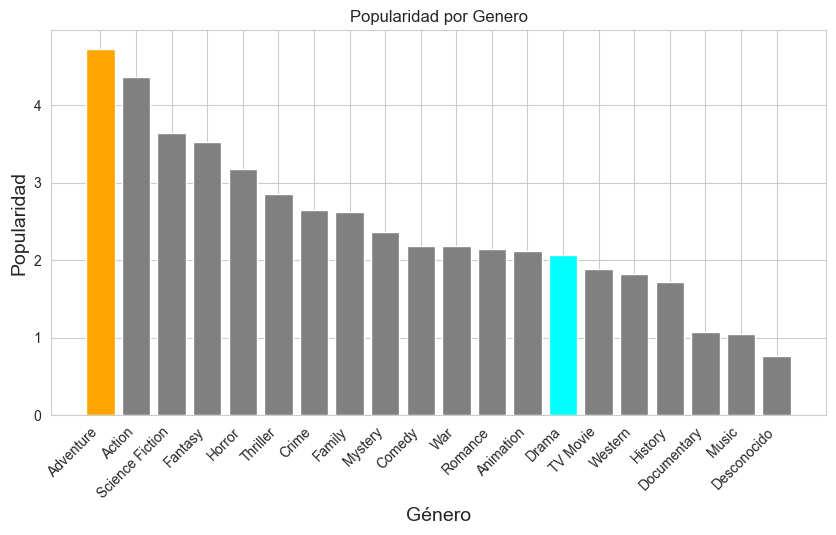

In [19]:
popularidad_por_genero = df2.groupby(['Genero 1'])['Popularidad'].mean()
popularidad_por_genero = popularidad_por_genero.sort_values(ascending=False)

condiciones = [
    popularidad_por_genero.index == 'Adventure',
    popularidad_por_genero.index == 'Drama'
]
colores = [
    'orange',
    'cyan'
]
color_map = np.select(condiciones, colores, default='gray')

sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
plt.bar(popularidad_por_genero.index, popularidad_por_genero.values,color=color_map)
plt.title('Popularidad por Genero')
plt.xlabel('Género', fontsize=14)
plt.ylabel('Popularidad', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

Podemos observar que el genero de Aventuras es el más popular aunque no destaca demasiado de la media.

El siguiente paso será ver la media de presupuestos por genero.

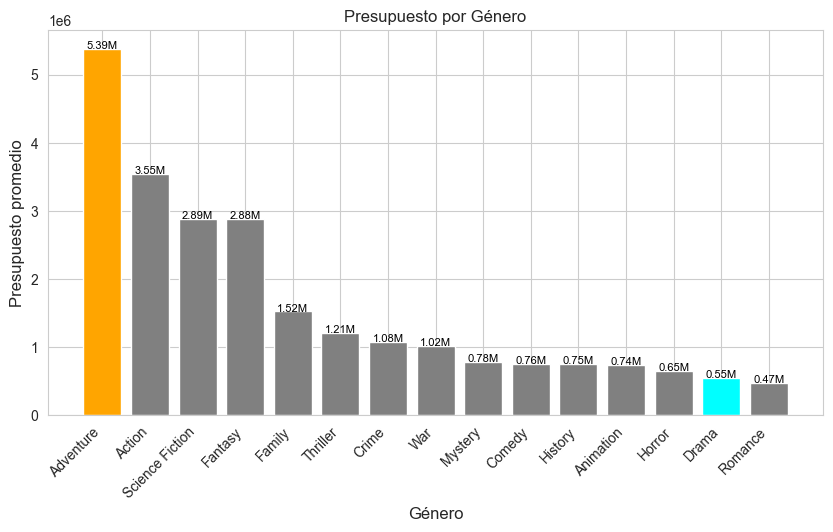

In [20]:
presupuesto_por_genero = df2.groupby(['Genero 1'])['Presupuesto'].mean()
presupuesto_por_genero = presupuesto_por_genero.sort_values(ascending=False).head(15)

condiciones = [
    presupuesto_por_genero.index == 'Adventure',
    presupuesto_por_genero.index == 'Drama'
]
colores = [
    'orange',
    'cyan'
]

color_map = np.select(condiciones, colores, default='gray')

plt.figure(figsize=(10, 5))
plt.bar(presupuesto_por_genero.index, presupuesto_por_genero.values, color=color_map)
plt.xlabel('Género', fontsize=12)
plt.title('Presupuesto por Género')
plt.ylabel('Presupuesto promedio', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
for i, v in enumerate(presupuesto_por_genero.values):
    plt.text(i, v + 0.5, str(round(v/1e6, 2)) + 'M', ha='center', fontsize=8, color='black')
plt.show()

También es la mas cara aparentemente, y bastante mas que los demás generos.

Vamos a ver la cantidad de peliculas producidas para cada genero.

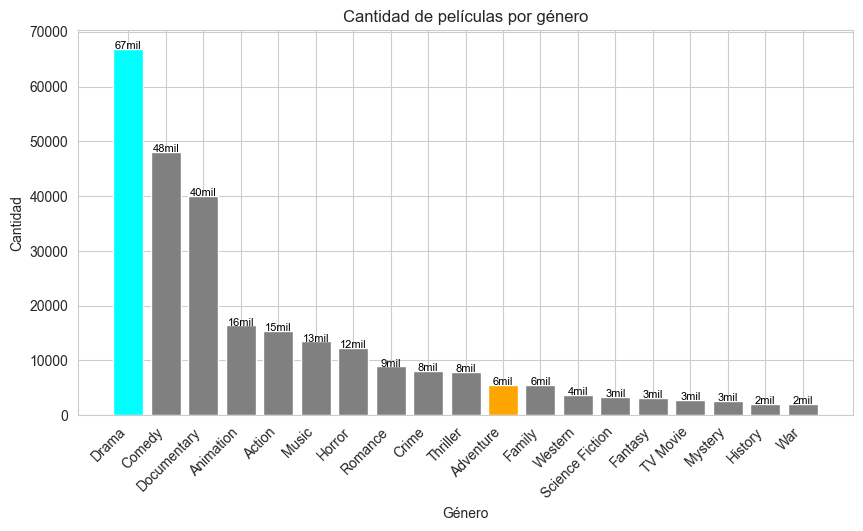

In [21]:
df2 = df2[df2['Genero 1'] != 'Desconocido']
peliculas_por_genero = df2['Genero 1'].value_counts()

condiciones = [
    peliculas_por_genero.index == 'Adventure',
    peliculas_por_genero.index == 'Drama'
]
colores = [
    'orange',
    'cyan'
]

color_map = np.select(condiciones, colores, default='gray')
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.bar(peliculas_por_genero.index, peliculas_por_genero.values,color=color_map)
plt.title('Cantidad de películas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right', fontsize=10)
for i, v in enumerate(peliculas_por_genero.values):
    plt.text(i, v + 0.5, str(round(v/1e3)) + 'mil', ha='center', fontsize=8, color='black')
plt.show()

Bueno, como podemos ver no es el genero mas producido es más no esta ni por encima de la media. Sin embargo Drama esta demasiado "explotado".

Con lo que tenemos ahora mismo no podemos tomar una decision clara, tenemos que seguir indagando en los datos y el siguiente paso serán los Idiomas

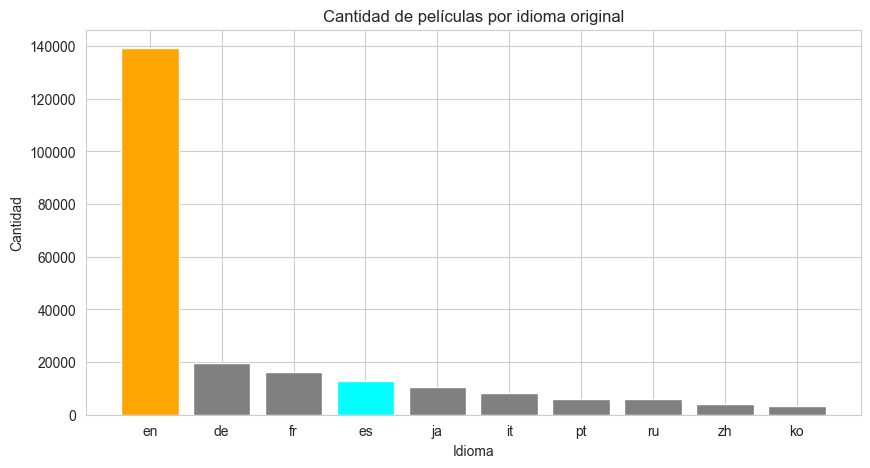

In [22]:
cantidad_peliculas_por_idioma = df2['Idioma original'].value_counts().nlargest(10)
condiciones = [
    cantidad_peliculas_por_idioma.index == 'en',
    cantidad_peliculas_por_idioma.index == 'es'
]
colores = [
    'orange',
    'cyan'
]

color_map = np.select(condiciones, colores, default='gray')
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.bar(cantidad_peliculas_por_idioma.index, cantidad_peliculas_por_idioma.values,color=color_map)
plt.title('Cantidad de películas por idioma original')
plt.xlabel('Idioma')
plt.ylabel('Cantidad')
plt.show()

Como podiamos preveer el idioma principal es el inglés, muy por encima de todos los demas.

Puede ser interesante consultar las duraciones de las peliculas, talvez la popularidad se vea influenciada por la duracion.

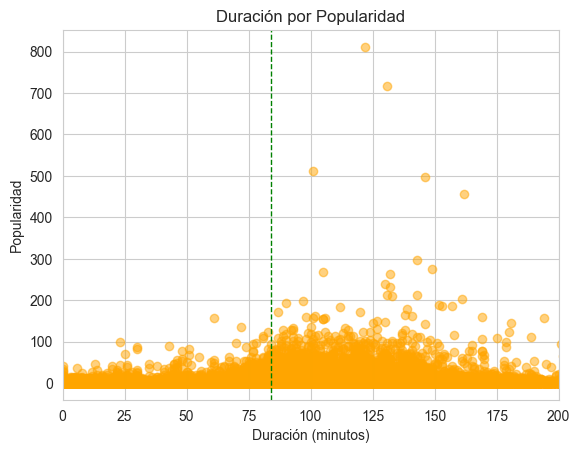

In [23]:
plt.scatter(df2['Duracion'], df2['Popularidad'], alpha=0.5,color='orange')
plt.axvline(df2['Duracion'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Duración por Popularidad')
plt.xlabel('Duración (minutos)')
plt.ylabel('Popularidad')
plt.xlim(0, 200)
plt.show()

No tenemos algo increiblemente claro con esta grafica salvo que hay un pequeño pico alrededor de los 120 minutos.

La media que tenemos en verde se nos queda desplazada por los outliers que tenemos de larga duracion, peliculas que no nos interesan.

Tambien podemos observar unas cuantas peliculas que sobresalen extremadamente por popularidad.

Al final estamos valorando una inversión, es posible que las peliculas mas duraderas cuesten mas?

Veamoslo:

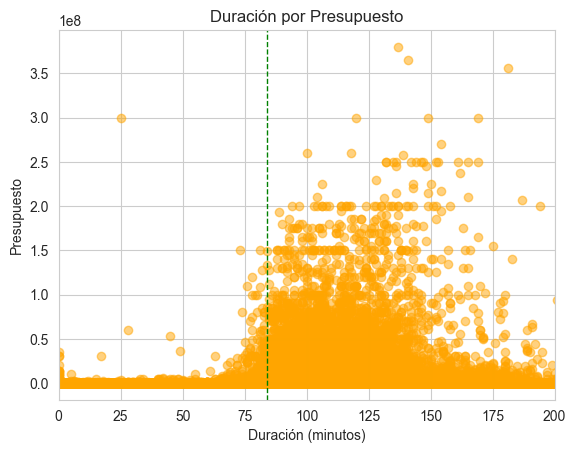

In [24]:
plt.scatter(df2['Duracion'], df2['Presupuesto'], alpha=0.5,color='orange')
plt.axvline(df2['Duracion'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Duración por Presupuesto')
plt.xlabel('Duración (minutos)')
plt.ylabel('Presupuesto')
plt.xlim(0, 200)
plt.show()

Aquí podemos ver mas claramente que las mas costosas rondan entre los 80 y los 150, que es nuestro foco de interés por ahora.

Y tenemos una en lo alto demostrando que ha sido la más costosa, veamos cual es:

In [25]:
pelicula_con_max_presupuesto = df.loc[df['Presupuesto'].idxmax()]
print(pelicula_con_max_presupuesto)

ID                                                          1865
Titulo               Pirates of the Caribbean: On Stranger Tides
Idioma original                                               en
Popularidad                                              119.832
Lanzamiento                                           2011-05-14
Presupuesto                                            380000000
Duracion                                                     137
Puntuacion                                                 6.529
Numero de votos                                            12730
Idiomas hablados                                 English,Español
Imagen de portada               /keGfSvCmYj7CvdRx36OdVrAEibE.jpg
Genero 1                                               Adventure
Genero 2                                                  Action
Genero 3                                                 Fantasy
Genero 4                                                     NaN
Genero 5                 

Debemos comprobar también los generos, veamos sus medias de duración

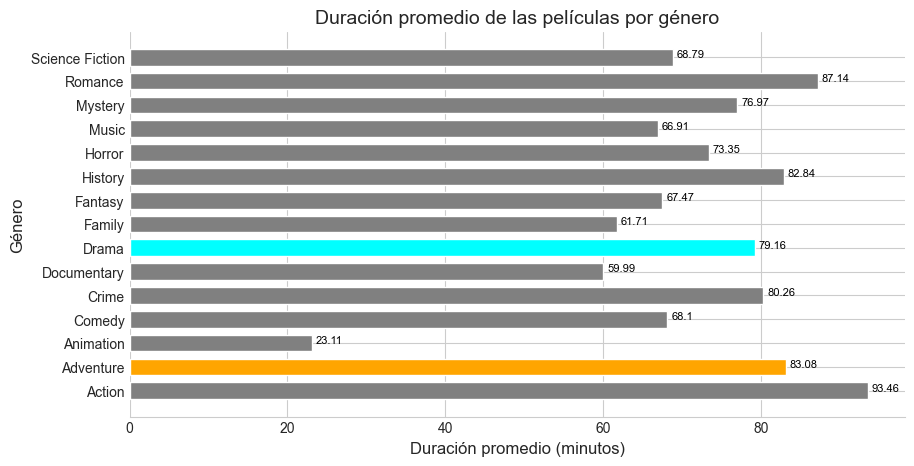

In [26]:
duracion_por_genero = df2.groupby(['Genero 1'])['Duracion'].mean().head(15)
sns.set_style('whitegrid')
condiciones = [
    duracion_por_genero.index == 'Adventure',
    duracion_por_genero.index == 'Drama'
]
colores = [
    'orange',
    'cyan'
]

color_map = np.select(condiciones, colores, default='gray')


fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(duracion_por_genero.index, duracion_por_genero.values, height=0.7, color=color_map)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', length=0)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
for i, v in enumerate(duracion_por_genero.values):
    ax.text(v + 0.5, i, str(round(v, 2)), ha='left', fontsize=8, color='black')
ax.set_title('Duración promedio de las películas por género', fontsize=14)
ax.set_xlabel('Duración promedio (minutos)', fontsize=12)
ax.set_ylabel('Género', fontsize=12)
plt.show()

Todas están al mismo nivel más o menos, a excepción de las Animaciones que muchas son cortos de apenas 15 minutos.

## Conclusión

Con todos los datos que tenemos y las graficas que hemos observado sacamos las siguientes conclusiones:

Los dramas son muy baratos y por eso hay demasiados en cartelera.

Las aventuras son muy populares pero son bastante más caras que los demas generos.

Los generos más equilibrados són Acción y Ciencia Ficción, siendo Acción un poco mas cara pero bastante más popular.

Es dificil tomar una decisión por que hay otros factores que no hemos contemplado como los beneficios reales de cada producción.

Pero tenemos un buen punto de partida para seleccionar nuestra siguiente inversion cinematografica.